## Logistic Regression

### implementacion de la funcion sigmoide

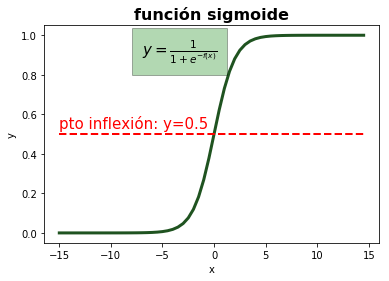

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sigmoide(x):
    res = [1 / (1 + np.exp(-ele)) for ele in x]
    return res
 
x = np.arange(-15, 15, 0.5)
y = sigmoide(x)
y_mid = [0.5 for ele in x]
 
fig = plt.figure()
sg = fig.add_subplot(111)
 
sg.set_title('función sigmoide',fontsize=16, fontweight='bold')
 
sg.set_xlabel('x')
sg.set_ylabel('y')
 
sg.text(-7, 0.9, r'$y=\frac{1}{1+e^{-f(x)}}$', style='italic',fontsize=15,
        bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})
 
sg.text(-15, 0.53, r'pto inflexión: y=0.5', fontsize=15, color='red')
 
plt.plot(x, y, color='#1F5320', lw = 3.0)
plt.plot(x, y_mid, color='red', lw = 2.0, ls = 'dashed')
 
plt.show()

## Data set Iris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import seaborn as sns


In [12]:
df = pd.read_csv('Iris.csv')
df = df.drop(['Id'],axis=1)
rows = list(range(100,150))
df = df.drop(df.index[rows])  
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(0)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()
X, Y = shuffle(X,Y)
X=np.array(X)
X=X[:, :2]
Y=np.array(Y)


[[5.5 2.6]
 [5.7 2.8]
 [4.4 3. ]
 [4.8 3.4]
 [5.  2. ]
 [4.8 3. ]
 [5.  3.5]
 [6.7 3. ]
 [4.6 3.4]
 [5.  3.2]
 [6.  3.4]
 [6.  2.9]
 [5.2 4.1]
 [5.9 3. ]
 [4.6 3.6]
 [6.1 2.9]
 [4.8 3. ]
 [4.9 2.4]
 [5.4 3.9]
 [6.4 2.9]
 [5.9 3.2]
 [5.5 2.5]
 [5.2 3.5]
 [6.  2.2]
 [6.2 2.2]
 [4.5 2.3]
 [5.8 2.6]
 [4.6 3.1]
 [6.6 2.9]
 [4.3 3. ]
 [4.7 3.2]
 [6.2 2.9]
 [5.7 2.6]
 [5.1 3.3]
 [5.8 4. ]
 [6.5 2.8]
 [4.8 3.1]
 [5.4 3.7]
 [5.6 2.5]
 [5.1 2.5]
 [6.3 2.5]
 [4.7 3.2]
 [5.  3.4]
 [5.6 2.9]
 [5.5 2.3]
 [4.4 3.2]
 [6.1 2.8]
 [5.7 2.9]
 [5.  3.3]
 [5.2 2.7]
 [5.  3.6]
 [6.6 3. ]
 [5.  3.5]
 [5.1 3.8]
 [4.9 3.1]
 [5.4 3.4]
 [5.  2.3]
 [5.5 2.4]
 [5.4 3.9]
 [4.8 3.4]
 [6.4 3.2]
 [5.8 2.7]
 [5.1 3.7]
 [4.9 3. ]
 [5.1 3.5]
 [5.  3. ]
 [5.1 3.8]
 [5.6 3. ]
 [5.5 4.2]
 [5.7 4.4]
 [6.9 3.1]
 [6.3 3.3]
 [5.1 3.8]
 [6.8 2.8]
 [5.1 3.4]
 [5.1 3.5]
 [6.1 2.8]
 [5.7 3. ]
 [5.5 3.5]
 [6.3 2.3]
 [7.  3.2]
 [5.  3.4]
 [5.7 2.8]
 [5.4 3. ]
 [4.9 3.1]
 [5.7 3.8]
 [5.3 3.7]
 [5.8 2.7]
 [4.6 3.2]
 [6.7 3.1]
 [5.2 3.4]

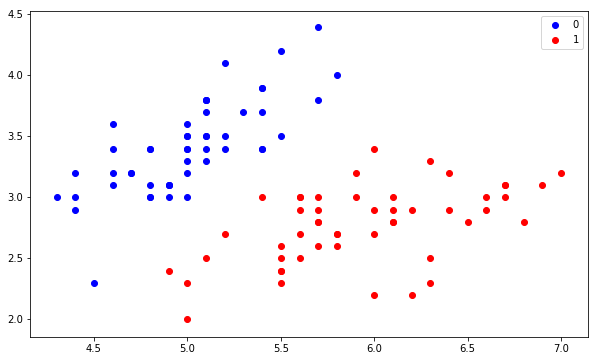

In [5]:

plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='1')
plt.legend();

## Implementacion de la regresion logistica

In [2]:
class logisticRegression:
    def __init__(self,learningRatio=0.1,numIterations=100000,fitIntercept=True,verbose=False):
        self.learningRatio=learningRatio
        self.numIterations=numIterations
        self.fitIntercept=fitIntercept
        self.verbose=verbose
    def addIntercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    def sigmoideFunction(self,x):
        return 1/(1+np.exp(-x))
    def costFunction(self,h,y):
        return (-y * np.log(h)-(1-y)*np.log(1-h)).mean()
    
    def fit(self, X, y):
        if self.fitIntercept:
            X = self.addIntercept(X)
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.numIterations):
            z = np.dot(X, self.theta)
            h = self.sigmoideFunction(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learningRatio * gradient
            
            z = np.dot(X, self.theta)
            h = self.sigmoideFunction(z)
            loss = self.costFunction(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fitIntercept:
            X = self.addIntercept(X)
    
        return self.sigmoideFunction(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()
    
    

In [7]:
model = logisticRegression(learningRatio=0.1, numIterations=300000)

In [8]:
%time model.fit(X, Y)

CPU times: user 16.6 s, sys: 37.3 ms, total: 16.7 s
Wall time: 16.7 s


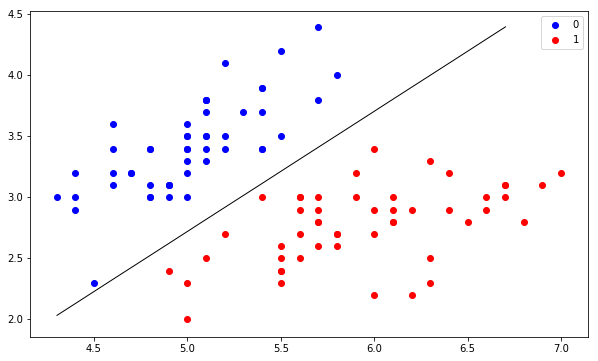

In [9]:

plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='1')
plt.legend();
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');